In [3]:
import requests as req
import pandas as pd
import time
import os
# Google developer API key
from config_local import GreaterSchools_api

In [4]:
# read sites 
mainfile = os.path.join("..","Project1_AmazonSites.xlsx")
xls = pd.ExcelFile(mainfile) 
sites_df=xls.parse('AmazonSites', dtype=str) 

In [3]:
school_sites= sites_df[['Site Name','State','Zip Code','Amazon City','Latitude','Longitude']]
school_sites.insert(len(school_sites.columns), 'Number of Schools',0)
school_sites.insert(len(school_sites.columns), 'Average School Rating',0)
school_sites.insert(len(school_sites.columns), 'Average Parent Rating',0)

school_sites

,Site Name,State,Zip Code,Amazon City,Latitude,Longitude,Number of Schools,Average School Rating,Average Parent Rating
0,Center for Innovation Technology,VA,20170,Northern Virginia Area,38.96,-77.42,0,0,0
1,Crystal City and Potomac Yard,VA,22202,Northern Virginia Area,38.84,-77.05,0,0,0
2,Nationals Park/ D.C United Stadium,DC,20024,Washington DC,38.86,-77.01,0,0,0
3,Union Station,DC,20002,Washington DC,38.89,-77,0,0,0
4,Hill-East Neighborhood,DC,20003,Washington DC,38.88,-76.97,0,0,0
5,Shaw-Howard University Area,DC,20001,Washington DC,38.91,-77.02,0,0,0
6,Warner Center West San Fernando Valley,CA,91367,Los Angeles,34.1802,-118.6028,0,0,0
7,New Hall Ranch Santa Clarita Valley,CA,91355,Los Angeles,34.4318,-118.5584,0,0,0
8,Pomona Fairplex,CA,91768,Los Angeles,34.0885,-117.7702,0,0,0
9,Suffolk Downs,MA,02128,Boston,42.39,-71,0,0,0


In [4]:
def school_ratings_per_site(schooldata):
    """school ratings_per_site
    given the data from GreatSchools API for a given zipcode
    returns the number of schools, average school rating and average parent rating
    """
    import xmltodict
    import numpy as np
    
    d = xmltodict.parse(schooldata)

    school_ratings=[]
    parent_ratings=[]
    num_schools = len(d['schools']['school'])
  
    for s in range(num_schools):
        name = d['schools']['school'][s]['name']
        if 'gsRating' in d['schools']['school'][s].keys():
            school_ratings.append(float(d['schools']['school'][s]['gsRating']))
        if 'parentRating' in d['schools']['school'][s].keys():
            parent_ratings.append(float(d['schools']['school'][s]['parentRating']))    
    average_school_rating = np.mean(school_ratings)
    average_parent_rating = np.mean(parent_ratings)

    return (num_schools, average_school_rating, average_parent_rating)

In [5]:
# Greatschools
base_query='https://api.greatschools.org/schools/nearby?key='+GreaterSchools_api

for index, row in school_sites.iterrows():
    state = row['State']
    zpcode = row['Zip Code']
    comp_query ='&state='+state+'&zip='+zpcode
    try:
        time.sleep(5)
        print(base_query+comp_query)
        response = req.get(base_query+comp_query)
        school_data=response.content
        print(response)
        num, s_r, p_r = school_ratings_per_site(school_data)
        school_sites.loc[index,'Number of Schools'] = num
        school_sites.loc[index,'Average School Rating'] = s_r
        school_sites.loc[index,'Average Parent Rating'] = p_r
    except: 
        print('error with get request')
    

https://api.greatschools.org/schools/nearby?key=01c0618d5efae13bf713db23eb2b8522&state=VA&zip=20170
<Response [200]>


/anaconda3/envs/PythonData_3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


https://api.greatschools.org/schools/nearby?key=01c0618d5efae13bf713db23eb2b8522&state=VA&zip=22202
<Response [200]>
https://api.greatschools.org/schools/nearby?key=01c0618d5efae13bf713db23eb2b8522&state=DC&zip=20024
<Response [200]>
https://api.greatschools.org/schools/nearby?key=01c0618d5efae13bf713db23eb2b8522&state=DC&zip=20002
<Response [200]>
https://api.greatschools.org/schools/nearby?key=01c0618d5efae13bf713db23eb2b8522&state=DC&zip=20003
<Response [200]>
https://api.greatschools.org/schools/nearby?key=01c0618d5efae13bf713db23eb2b8522&state=DC&zip=20001
<Response [200]>
https://api.greatschools.org/schools/nearby?key=01c0618d5efae13bf713db23eb2b8522&state=CA&zip=91367
<Response [200]>
https://api.greatschools.org/schools/nearby?key=01c0618d5efae13bf713db23eb2b8522&state=CA&zip=91355
<Response [200]>
https://api.greatschools.org/schools/nearby?key=01c0618d5efae13bf713db23eb2b8522&state=CA&zip=91768
<Response [200]>
https://api.greatschools.org/schools/nearby?key=01c0618d5efae13b

In [7]:
schoolsfile = os.path.join("Results","schools_GreatSchool.csv")
school_sites.to_csv(schoolsfile)

In [31]:
school_sites  

,Site Name,State,Zip Code,Amazon City,Latitude,Longitude,Number of Schools,Average School Rating,Average Parent Rating
0,Center for Innovation Technology,VA,20170,Northern Virginia Area,38.96,-77.42,70,4.875000,4.064516
1,Crystal City and Potomac Yard,VA,22202,Northern Virginia Area,38.84,-77.05,65,4.714286,4.237288
2,Nationals Park/ D.C United Stadium,DC,20024,Washington DC,38.86,-77.01,200,5.307692,3.914110
3,Union Station,DC,20002,Washington DC,38.89,-77,200,5.326733,3.937888
4,Hill-East Neighborhood,DC,20003,Washington DC,38.88,-76.97,200,5.065421,3.832298
5,Shaw-Howard University Area,DC,20001,Washington DC,38.91,-77.02,200,5.956989,4.000000
6,Warner Center West San Fernando Valley,CA,91367,Los Angeles,34.1802,-118.6028,158,5.441176,4.242424
7,New Hall Ranch Santa Clarita Valley,CA,91355,Los Angeles,34.4318,-118.5584,55,7.694444,4.219512
8,Pomona Fairplex,CA,91768,Los Angeles,34.0885,-117.7702,154,5.722892,3.928571
9,Suffolk Downs,MA,02128,Boston,42.39,-71,190,4.327273,4.082803


In [32]:
#reduce to cities
cities = sites_df[['Amazon City', 'Site Name']]
cities = cities.merge(school_sites)


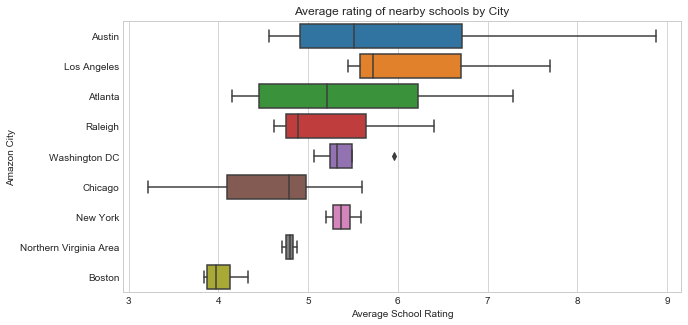

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cities = cities.sort_values('Average School Rating', ascending=False)
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.boxplot(x='Average School Rating',y='Amazon City',data=cities)
plt.title("Average rating of nearby schools by City")
plt.show()

In [49]:
ranking_schools=cities.groupby(['Amazon City'])['Average School Rating'].mean()
ranking_schools=ranking_schools.reset_index()
ranking_schools = ranking_schools.sort_values('Average School Rating', ascending=False)
ranking_schools = ranking_schools.rename(columns={'Amazon City':'Schools Ranking'})
ranking_schools

,Schools Ranking,Average School Rating
4,Los Angeles,6.286171
1,Austin,6.029233
0,Atlanta,5.463783
8,Washington DC,5.414209
5,New York,5.379339
7,Raleigh,5.303704
6,Northern Virginia Area,4.794643
3,Chicago,4.551157
2,Boston,4.030282


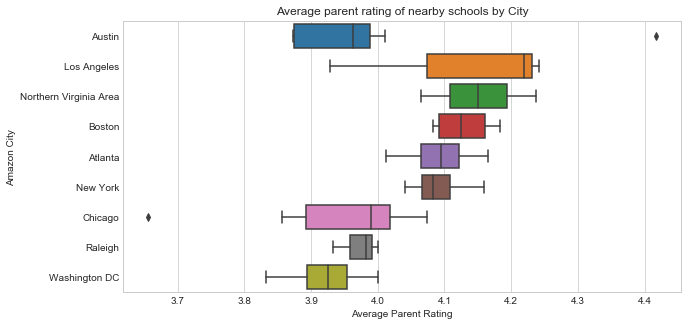

In [50]:
cities = cities.sort_values('Average Parent Rating', ascending=False)
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.boxplot(x='Average Parent Rating',y='Amazon City',data=cities)
plt.title("Average parent rating of nearby schools by City")
plt.show()

In [51]:
ranking_parents=cities.groupby('Amazon City')['Average Parent Rating'].mean()
ranking_parents = ranking_parents.reset_index()
ranking_parents = ranking_parents.sort_values('Average Parent Rating', ascending=False)
ranking_parents = ranking_parents.rename(columns={'Amazon City':'Schools Parent Ranking'})
ranking_parents

,Schools Parent Ranking,Average Parent Rating
6,Northern Virginia Area,4.150902
4,Los Angeles,4.130169
2,Boston,4.128633
0,Atlanta,4.091344
5,New York,4.091303
1,Austin,3.996676
7,Raleigh,3.971930
3,Chicago,3.940127
8,Washington DC,3.921074


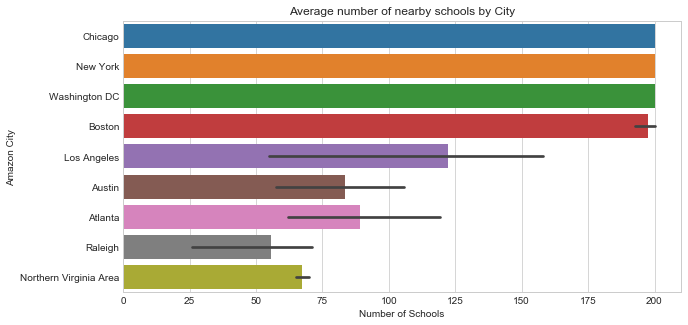

In [52]:
cities = cities.sort_values('Number of Schools', ascending=False)
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.barplot(x='Number of Schools',y='Amazon City',data=cities)
plt.title("Average number of nearby schools by City")
plt.savefig("Plots/numberschoolscity.png")
plt.show()